# Introduction To Machine Learning : Walk-through of an ML Example

### For an introduction to the terminologies of ML, as well as a brief theoretical overview, please refer to https://blog_link.com

### We look at the Iris dataset to get familiar with the tools used for ML and methodologies generally implemented to get from a dataset to the required answers.

Table of Contents:
> 1. <a href="#Step 0">Step 0: Library Imports</a>
> 1. <a href="#Step 1">Step 1: Get the Data</a>
> 1. <a href="#Step 2">Step 2: Preprocess the Data</a>
> 1. <a href="#Step 3">Step 3: Use an ML Algorithm</a>

<a id="Step 0"></a>
### Step 0:  Library Imports

In [1]:
import numpy as np

**NumPy is the fundamental package for scientific computing with Python**. It provides efficient array objects, which are used by almost every other library in Python to handle n-dimensional arrays. It provides a very user-friendly interface, and gives a great deal of functionality.

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

Explore further: http://www.numpy.org/

In [2]:
import pandas as pd

**Pandas provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language**.
It runs NumPy in the backend, and seamlessly helps you perform tedious tasks with 1 line of code.

Explore further: https://pandas.pydata.org/

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

**Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms**.
Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code.

The pyplot module provides a Matlab type interface.

Explore further: https://matplotlib.org/

In [4]:
import seaborn as sns

**Seaborn is a Python data visualization library based on matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics. It interfaces well with Pandas.

Explore further: https://seaborn.pydata.org/

In [5]:
from sklearn.datasets import load_iris

**Scikit Learn provides easy implementation of Machine Learning concepts as Black Boxes in Python**.
It has simple and efficient tools for data mining and data analysis, and is built on NumPy, SciPy, and matplotlib.
For every ML algorithm, there is almost a standard interface you can use to implement the algorithm.

Explore further: http://scikit-learn.org/stable/

![Python Scientific Ecosystem](img/Python Scientific Ecosystem.png)

Source: https://www.slideshare.net/turi-inc/dato-2015-talk

![Matlab Vs. Python](img/Matlab vs Python.png)

Source: https://www.python-course.eu/numpy.php

<a id="Step 1"></a>
### Step 1: Get the Data

In [6]:
iris_data = load_iris()

>**The Iris Dataset is a famous dataset, the data for which has been included directly in the Scikit Learn library.
Let's explore it further.**

In [7]:
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


The above type is speific to a dataset loaded from sklearn.datasets. *It is essentially a dictionary*.

In [8]:
print(iris_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


Let's look at the description 

In [9]:
print(iris_data['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

> *Number of instances* is your **training data size**.

> *Number of attributes* is your **number of features** for each example.

> *Class* is your **target variable**.

In [10]:
print(iris_data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


We are given the names of each feature, but we may not be so lucky for other generic datasets. Having feature names allows *interpretability* of simple models.

Since this is such a famous repository, we can go the extent of finding out what these feature names actually mean. The following image summarises it all.

![Iris](img/Iris.png)

Source: https://rpubs.com/wjholst/322258

In [11]:
iris_dataset = pd.DataFrame(data=iris_data['data'], columns=iris_data['feature_names'])

We make a **dataframe object** out of the data which was in a NumPy array. Now, we can use Pandas functions to get further *insights* into the dataset.

In [12]:
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The .head() method gives us the top few datapoint values.

In [13]:
iris_dataset['target'] = iris_data['target']

Inserting a new column is very simple in pandas. We can refer to the column as if it existed, and then pass in data to be stored.

In [14]:
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

These are the names for the classes:

0 - Setosa

1 - Versicolor

2 - Virginica

In [16]:
iris_dataset['target_name'] = np.apply_along_axis(lambda x: iris_data['target_names'][x], 0, iris_data['target'])

NumPy has an 'apply along axis' function, using which you can apply a function along a particular axis of a given array.

In [17]:
iris_dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


> *Why convert an array to a dataframe?*

> Because now we can perform what is known as **Exploratory Data Analysis**, using only a few lines of code. Or use Pandas and Seaborn for what they're good at.

In [18]:
iris_dataset.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,1.000000,NaN
std,0.828066,0.433594,1.764420,0.763161,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN


The describe() function provides statistics on each data-column in the dataframe. Thus, we can quickly understand our data distribution.

In [19]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
target_name          150 non-null object
dtypes: float64(4), int32(1), object(1)
memory usage: 6.5+ KB


The info() function tells us the number of *non-null values* in each column, alongwith the *datatype* of each column.

> ### All of the above features are important in Machine Learning. 

> ### Data Imputation, Data Distribution, and getting your data ready for an ML model are essential steps in any ML problem.

In [20]:
iris_dataset.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


The .corr() function directly tells us the *correlation* between each pair of columns.

In [21]:
sns.set_style('whitegrid')

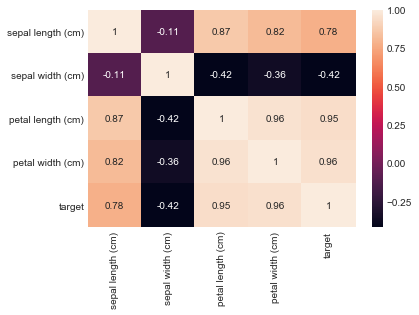

In [22]:
sns.heatmap(iris_dataset.corr(), annot=True)

A heatmap is a much better way to visualize the correlations, especially for a small dataset.

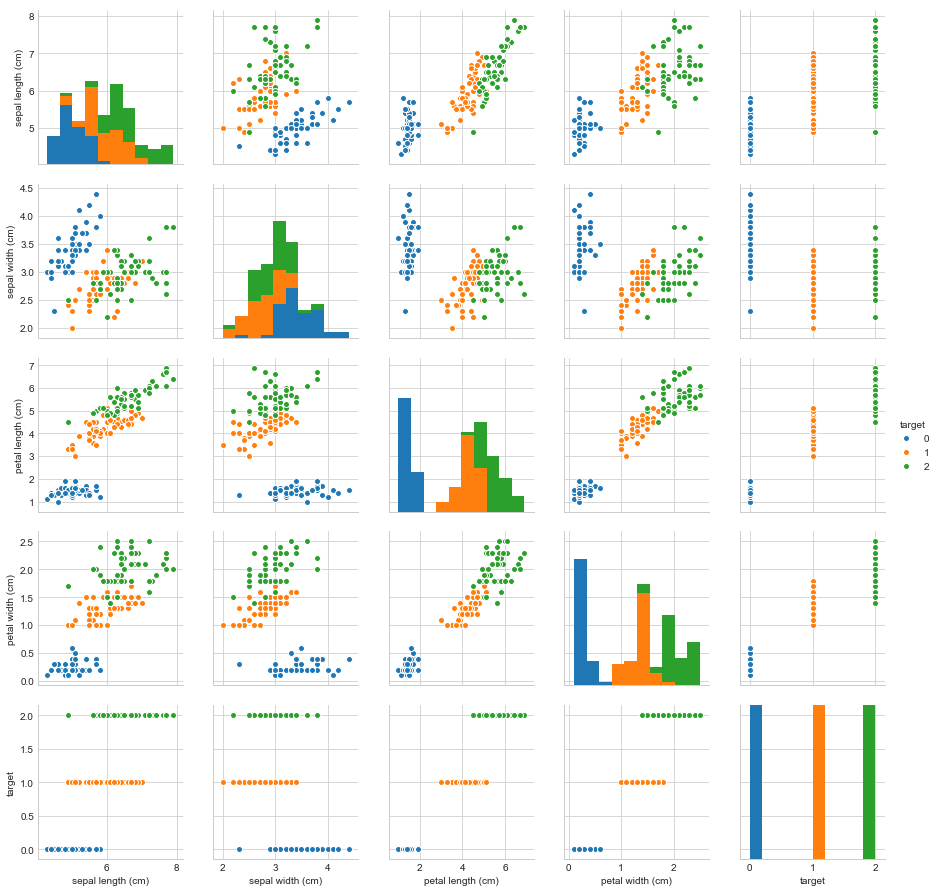

In [23]:
sns.pairplot(iris_dataset, hue='target')

A pairplot conviniently allows us to look at the data in a pictorical format.

A scatterplot is plotted for every pair of 2 different columns.

For the same column pair, a histogram is plotted.

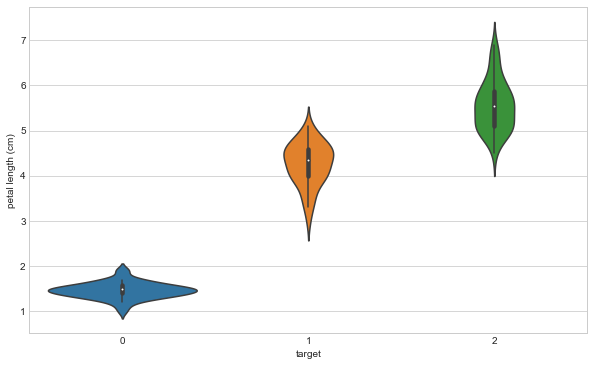

In [25]:
plt.figure(figsize=(10,6))
sns.violinplot(x = 'target', y='petal length (cm)', data=iris_dataset)

A violinplot allows us to look at kernel density estimations of data.

More: https://seaborn.pydata.org/generated/seaborn.violinplot.html

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. KDE gives a visual representation of the data.

More: https://en.wikipedia.org/wiki/Kernel_density_estimation

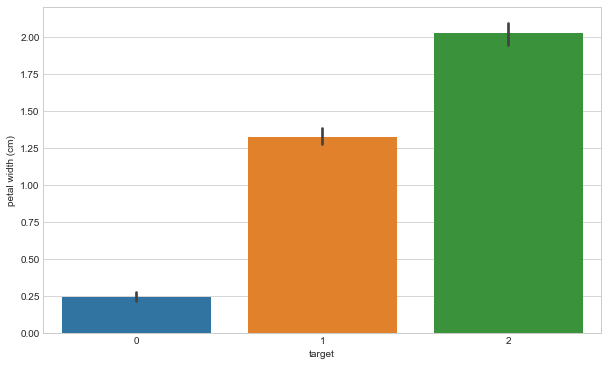

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'target', y='petal width (cm)', data=iris_dataset)

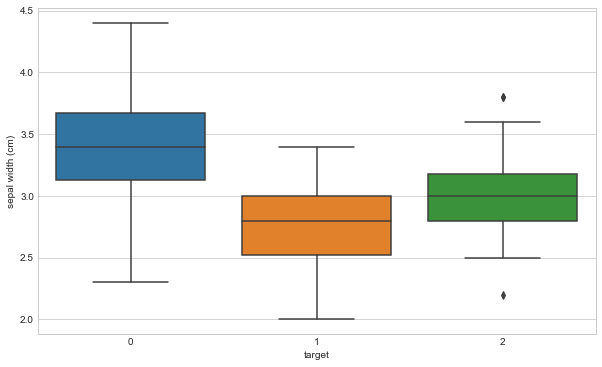

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'target', y='sepal width (cm)', data=iris_dataset)

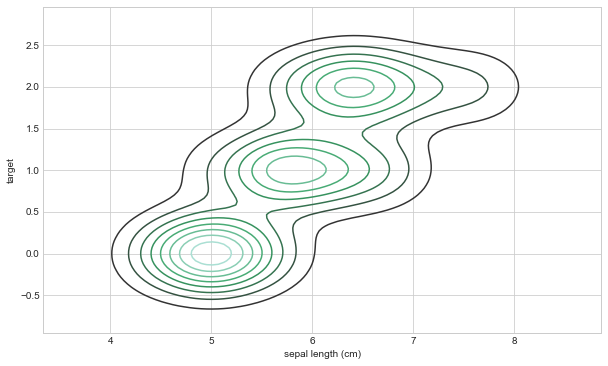

In [28]:
plt.figure(figsize=(10,6))
sns.kdeplot(iris_dataset['sepal length (cm)'], iris_dataset['target'])

<a id="Step 2"></a>
### Step 2: Preprocess the Data

>In this dataset, we see that there are no missing values. So, we can skip that step. Instead, a lot of Linear algorithms suffer if **all features are not at the same scale**. Hence, we use normalization/scaling to bring all variables to the same scale.

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**MinMaxScaler** scales the values using the *minimum and maximum values* of the data, to a *given range* provided by the user.

**StandardScaler** scales the data to have *zero mean and unit variance*.

In [30]:
X = iris_dataset.drop(['target', 'target_name'], axis=1)

In [31]:
Y = iris_dataset['target']

In [32]:
scaler = StandardScaler()

In [33]:
X_sc = scaler.fit_transform(X)

The *fit* method uses the data to get a few variables it needs for future use, and the *transform* method applies the transformation to the given input data.

*fit_transform* performs both in one function call.

In [34]:
print("Minimum:",X_sc.min())
print("Maximum:",X_sc.max())
print("Mean:",X_sc.mean())
print("Standard Devaition:",X_sc.std())

Minimum: -2.438987252491842
Maximum: 3.1146839106774347
Mean: -1.3263464400855204e-15
Standard Devaition: 1.0


In [35]:
from sklearn.model_selection import train_test_split

train_test_split performs a split of the data into training and test sets.

### A brief aside: Training, Test and Validation Splits:

>For machine learning, we care about the model **generalizing to unseen data**. That's what makes ML a particularly interesting field.
To measure performance on unseen data, we literally divide the data we have into a **training set and a test set**. 
The training data is used to train the algorithm.
The test set has labels, so we can compare the output of our algorithm to these labels to find out how well it did on unseen data.

>Now, one thing we need to remember is that we have **multiple choices for our algorithms**. And for each algorithm, we have **multiple parameters** that we need to set manually. So, if we use test set performance to make these choices, we may end up choosing an algorithm that will do well *only on the test set*, without explicitly training on it.

>A workaround for this is to have another subdivision of the training set into a **validation set**. This set can be used to make algorithmic choices, and we will have an unbiased estimate of the performance of the final chosen algorithm using the test set.

>One thing we need to consider is that the dataset we have *may not be a true representative of the data* on which this algorithm will finally be used. So, even though we have an explicit test set, real performance may differ.

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

We do not need scaling of the variables in this example, so we apply train-test-split to the original data.

*Is it practical to split the data, if we have very little of it (like for this example), have into even smaller sections?*

Here, we use a concept of **K-fold cross-validation**. The training data is split into K equal subsets, and we train the algorithm K times, each time using a diferent subset of the data as the validation set. Thus, we get a somewhat good estimate of the validation accuracy to find the best model.

<a id="Step 3"></a>
### Step 3: Use an ML Algorithm to predict the class

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

For any ML algorithm in Scikit Learn, we have a **fit and score** method.

We always first **create an object** of the class of the algorithm, and provide parameters to it during the creation of the object.

Next, we call the *.fit()* method to train the algorithm on the data we provide as arguments to this function.

Finally, we can call *.score()* to get the score of the algorithm.

In [38]:
lr = LogisticRegression()

lr.fit(X_train, Y_train)

print(lr.score(X_train, Y_train))

print(lr.score(X_test, Y_test))

0.9464285714285714
0.9210526315789473


In [39]:
from sklearn.model_selection import cross_val_score

**cross_val_score** will run cross_validation on given model, and return an array of scores on the validation set.

In [40]:
cv = cross_val_score(lr, X, Y, cv=5)
print(cv)
print(cv.mean())

[1.         0.96666667 0.93333333 0.9        1.        ]
0.9600000000000002


In [41]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

print(dtc.score(X_train, Y_train))

print(dtc.score(X_test, Y_test))

1.0
0.9473684210526315


In [42]:
cv = cross_val_score(dtc, X, Y, cv=5)
print(cv)
print(cv.mean())

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
0.9600000000000002


In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=3000)

mlp.fit(X_train, Y_train)

print(mlp.score(X_train, Y_train))

print(mlp.score(X_test, Y_test))

0.33035714285714285
0.34210526315789475


In [44]:
cv = cross_val_score(mlp, X, Y, cv=5)
print(cv)
print(cv.mean())

[1.         0.96666667 0.93333333 0.93333333 1.        ]
0.9666666666666668


All the above algorithms have their individual hyperparameters that need tuning. Hyperparameters are basically parameters of the algorithm that we have to set.

Future blog posts will explore ML algorithms in depth, alongwith their implementation from scratch (using minimal libraries).

**A brief overview will be given before diving into depth, so please do check them out!**

**Thanks for reading! Please do feel free to connect with us on LinkedIn, and leave feedback for us on Twitter.**

LinkedIn: https://www.linkedin.com/in/aditya-khandelwal/

https://www.linkedin.com/in/renu-khandelwal/

Twitter: https://twitter.com/adityak6798